In [73]:
import pandas as pd
import yfinance as yf

df = yf.download('^N225')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0
1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0
1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0
1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0
1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0
...,...,...,...,...,...,...
2023-12-08,32600.470703,32604.349609,32205.380859,32307.859375,32307.859375,144200000
2023-12-11,32665.089844,32933.078125,32650.099609,32791.800781,32791.800781,105800000
2023-12-12,33107.648438,33172.128906,32800.238281,32843.699219,32843.699219,98100000


In [86]:
from prophet import Prophet

model = Prophet()
data = pd.DataFrame(df['Close'].values, columns=['y'])
data['ds'] = df.index

# data = data.reset_index(drop=False)
print(data)
res = model.fit(data.dropna()[-100:])
res

22:42:10 - cmdstanpy - INFO - Chain [1] start processing


22:42:10 - cmdstanpy - INFO - Chain [1] done processing


                  y         ds
0       1257.719971 1965-01-05
1       1263.989990 1965-01-06
2       1274.270020 1965-01-07
3       1286.430054 1965-01-08
4       1288.540039 1965-01-12
...             ...        ...
14492  32307.859375 2023-12-08
14493  32791.800781 2023-12-11
14494  32843.699219 2023-12-12
14495  32926.351562 2023-12-13
14496  32686.250000 2023-12-14

[14497 rows x 2 columns]


In [87]:
from prophet import plot

future = res.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-07-21,32687.143549,32148.623865,33266.871390,32687.143549,32687.143549,39.313878,39.313878,39.313878,39.313878,39.313878,39.313878,0.0,0.0,0.0,32726.457427
1,2023-07-24,32612.704914,32099.999009,33236.515508,32612.704914,32612.704914,71.821441,71.821441,71.821441,71.821441,71.821441,71.821441,0.0,0.0,0.0,32684.526356
2,2023-07-25,32587.892036,32113.798082,33259.947585,32587.892036,32587.892036,116.818583,116.818583,116.818583,116.818583,116.818583,116.818583,0.0,0.0,0.0,32704.710619
3,2023-07-26,32563.079158,32135.084614,33264.521168,32563.079158,32563.079158,146.723141,146.723141,146.723141,146.723141,146.723141,146.723141,0.0,0.0,0.0,32709.802299
4,2023-07-27,32538.266273,32036.919254,33248.488785,32538.266273,32538.266273,103.331560,103.331560,103.331560,103.331560,103.331560,103.331560,0.0,0.0,0.0,32641.597833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2024-01-09,33187.844035,32444.575205,34193.734661,32555.421853,33835.223570,116.818583,116.818583,116.818583,116.818583,116.818583,116.818583,0.0,0.0,0.0,33304.662617
126,2024-01-10,33193.225983,32390.385656,34242.941136,32534.397506,33884.051274,146.723141,146.723141,146.723141,146.723141,146.723141,146.723141,0.0,0.0,0.0,33339.949124
127,2024-01-11,33198.607931,32404.979128,34307.639452,32496.617058,33924.637441,103.331560,103.331560,103.331560,103.331560,103.331560,103.331560,0.0,0.0,0.0,33301.939491
128,2024-01-12,33203.989880,32227.807448,34199.149407,32462.199824,33970.356143,39.313878,39.313878,39.313878,39.313878,39.313878,39.313878,0.0,0.0,0.0,33243.303758


In [88]:
# 予測結果をプロット
# 黒点が実際のプロット
plot.plot_plotly(model, forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 7, 21, 0, 0),
                          datetime.datetime(2023, 7, 24, 0, 0),
                          datetime.datetime(2023, 7, 25, 0, 0),
                          datetime.datetime(2023, 7, 26, 0, 0),
                          datetime.datetime(2023, 7, 27, 0, 0),
                          datetime.datetime(2023, 7, 28, 0, 0),
                          datetime.datetime(2023, 7, 31, 0, 0),
                          datetime.datetime(2023, 8, 1, 0, 0),
                          datetime.datetime(2023, 8, 2, 0, 0),
                          datetime.datetime(2023, 8, 3, 0, 0),
                          datetime.datetime(2023, 8, 4, 0, 0),
                          datetime.datetime(2023, 8, 7, 0, 0),
                          datetime.datetime(2023, 8, 8, 0, 0),
                          datetime.datetime(2023, 8, 9, 0, 0),
                          datetime.datetime(2023, 8, 10, 0, 0),
                          datetime.datetime(2023, 8, 14, 0, 0),
                          datetime.datetime(2023, 8, 15, 0, 0),
                          datetime.datetime(2023, 8, 16, 0, 0),
                          datetime.datetime(2023, 8, 17, 0, 0),
                          datetime.datetime(2023, 8, 18, 0, 0),
                          datetime.datetime(2023, 8, 21, 0, 0),
                          datetime.datetime(2023, 8, 22, 0, 0),
                          datetime.datetime(2023, 8, 23, 0, 0),
                          datetime.datetime(2023, 8, 24, 0, 0),
                          datetime.datetime(2023, 8, 25, 0, 0),
                          datetime.datetime(2023, 8, 28, 0, 0),
                          datetime.datetime(2023, 8, 29, 0, 0),
                          datetime.datetime(2023, 8, 30, 0, 0),
                          datetime.datetime(2023, 8, 31, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0),
                          datetime.datetime(2023, 9, 4, 0, 0),
                          datetime.datetime(2023, 9, 5, 0, 0),
                          datetime.datetime(2023, 9, 6, 0, 0),
                          datetime.datetime(2023, 9, 7, 0, 0),
                          datetime.datetime(2023, 9, 8, 0, 0),
                          datetime.datetime(2023, 9, 11, 0, 0),
                          datetime.datetime(2023, 9, 12, 0, 0),
                          datetime.datetime(2023, 9, 13, 0, 0),
                          datetime.datetime(2023, 9, 14, 0, 0),
                          datetime.datetime(2023, 9, 15, 0, 0),
                          datetime.datetime(2023, 9, 19, 0, 0),
                          datetime.datetime(2023, 9, 20, 0, 0),
                          datetime.datetime(2023, 9, 21, 0, 0),
                          datetime.datetime(2023, 9, 22, 0, 0),
                          datetime.datetime(2023, 9, 25, 0, 0),
                          datetime.datetime(2023, 9, 26, 0, 0),
                          datetime.datetime(2023, 9, 27, 0, 0),
                          datetime.datetime(2023, 9, 28, 0, 0),
                          datetime.datetime(2023, 9, 29, 0, 0),
                          datetime.datetime(2023, 10, 2, 0, 0),
                          datetime.datetime(2023, 10, 3, 0, 0),
                          datetime.datetime(2023, 10, 4, 0, 0),
                          datetime.datetime(2023, 10, 5, 0, 0),
                          datetime.datetime(2023, 10, 6, 0, 0),
                          datetime.datetime(2023, 10, 10, 0, 0),
                          datetime.datetime(2023, 10, 11, 0, 0),
                          datetime.datetime(2023, 10, 12, 0, 0),
                          datetime.datetime(2023, 10, 13, 0, 0),
                          datetime.datetime(2023, 10, 16, 0, 0),
                          datetime.datetime(2023, 10, 17, 0, 0),
     

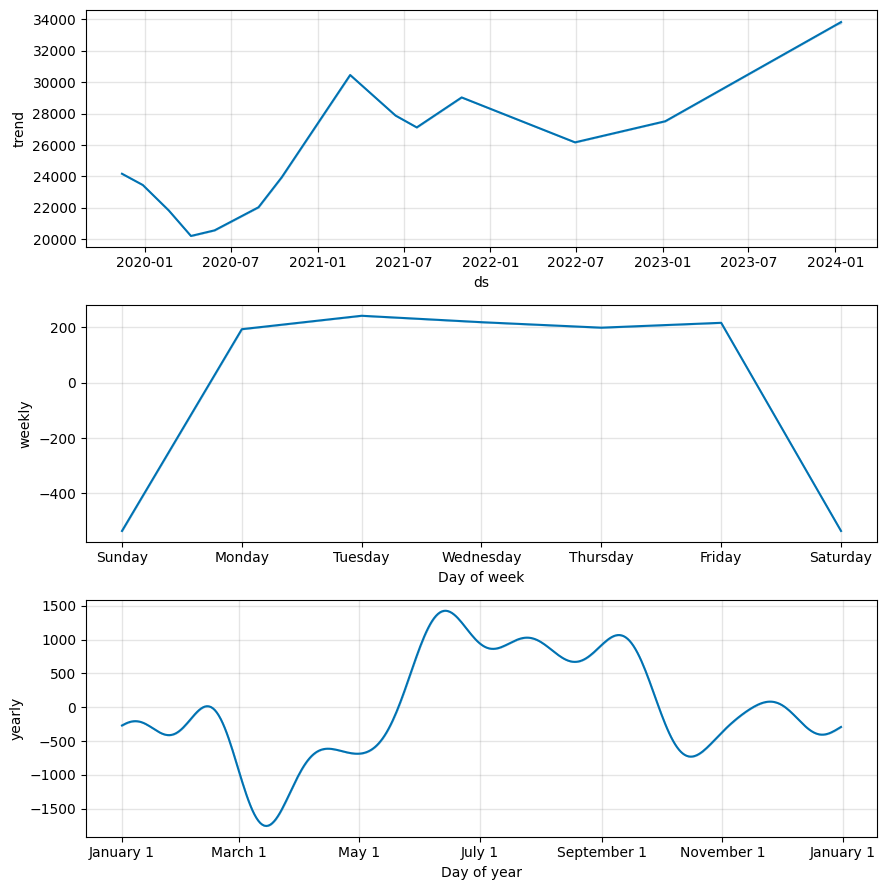

In [85]:
# y = g + s + h + eps
plot.plot_components(model, forecast);